In [86]:
%matplotlib inline

# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv

In [87]:
# Verify the current directory

Current_Path = os.getcwd()
Current_Path

'/Users/Younes/Desktop/Useful-Repository-master/Pyber'

In [92]:
# File to Load 

load_city_data = "City_Data.csv"
load_ride_data = "Ride_Data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(load_city_data)
ride_data = pd.read_csv(load_ride_data)

In [93]:
# Display the columns

city_data.columns

Index(['city', 'driver_count', 'type'], dtype='object')

In [94]:
# Display the columns

ride_data.columns

Index(['city', 'date', 'fare', 'ride_id'], dtype='object')

In [95]:
# Combine the data into a single dataset

New_df = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview

New_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

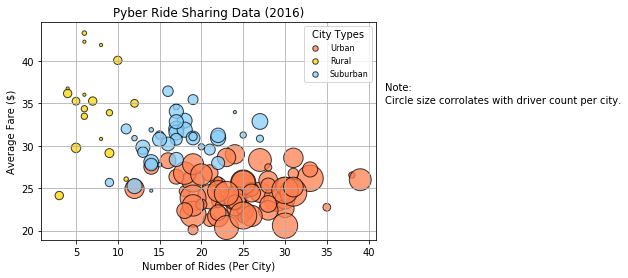

In [119]:
# Categorizing city

urban_city = New_df[New_df["type"] == "Urban"].groupby([New_df["city"]])
rural_city = New_df[New_df["type"] == "Rural"].groupby([New_df["city"]])
suburban_city = New_df[New_df["type"] == "Suburban"].groupby([New_df["city"]])

# Per city calculations of Average Fare, Total Rides and Total Drivers for Urban cities

avg_fare_urban = urban_city["ride_id"].count()
total_ride_urban = urban_city["fare"].mean()
total_drivers_urban = urban_city["driver_count"].mean()

# Per city calculations of Average Fare, Total Rides and Total Drivers for rural cities

avg_fare_rural = rural_city["ride_id"].count()
total_ride_rural = rural_city["fare"].mean()
total_drivers_rural = rural_city["driver_count"].mean()

# Per city calculations of Average Fare, Total Rides and Total Drivers for suburban cities

avg_fare_suburban = suburban_city["ride_id"].count()
total_ride_suburban = suburban_city["fare"].mean()
total_drivers_suburban = suburban_city["driver_count"].mean()

# Add plot

plt.scatter(avg_fare_urban, total_ride_urban, label = "Urban", s=s_urban * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(avg_fare_rural, total_ride_rural, label = "Rural", s=s_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(avg_fare_suburban, total_ride_suburban, label = "Suburban", s=s_suburban  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")

# Add text to the plot

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.text(42,36.5,'Note: ')
plt.text(42,35,'Circle size corrolates with driver count per city.')


# Add and adjust legend

legend = plt.legend(fontsize = 8, title= "City Types") 

legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

#plt.text(42,35,"Note: \nCircle size correlates with driver count per city.")


# Show plot

plt.show()

## Total Fares by City Type

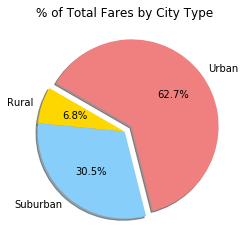

In [97]:
# Calculate Type Percents

group_type = New_df.groupby(['type'])
total_fare = group_type['fare'].sum()

# Build Pie Chart

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Show Figure

plt.show()

## Total Rides by City Type

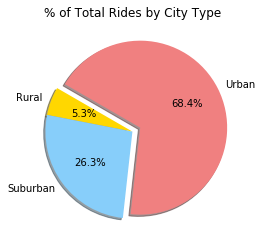

In [98]:
#  Calculate Type Percents

rides_count = group_type['ride_id'].count()

# Build Pie Chart

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Show Figure

plt.show()

## Total Drivers by City Type

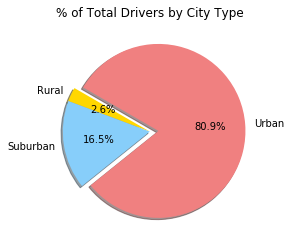

In [99]:
# Calculate Type Percents

group_type_drivers = city_data.groupby(['type'])
total_drivers = group_type_drivers['driver_count'].sum()

# Build Pie Chart

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Show Figure

plt.show()